#### Task 3
Create a notebook called assignment03-pie.ipynb

The note book should have a nice pie chart of peoples email domains in the csv file at the url

https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

This csv file has 1000 people. You may download the data or link to it.

Marks will be given for:

- Just creating the pie chart
- Making it look nice
- And as always, a very small amount of marks will be given for just pushing something to your repository this week
- As always, your code should be well laid out

If you are having difficulties, know I will be doing more on Pie charts later in this module.

##### 3.1 Importing libraries and reading in the data
Let's start off by importing pandas to handle the data and matplotlib.pyplot for creating the chart.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We'll load the .csv into a dataframe (df). We'll read in the .csv file, which we know is at the previously referenced URL.

In [2]:
## The location of our .csv is
address = 'https://drive.google.com/uc?export=download&id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK'
df = pd.read_csv(address)

To make sure everything is loaded correctly, I'll display the first few rows and check the structure of the dataframe. 

In [3]:
## Let's show the first few rows and the DF info before creating the chart
print("DF Head:")
print(df.head())

print("\nDF Info:")
print(df.info())

DF Head:
   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  

DF Info:
<class 'pandas.core.frame.DataF

##### 3.2 Creating the chart
This looks good; we're now ready to create the chart. We need to create a function to extract the domain -  we do this by splitting the email string at the @ symbol. We'll also provide details of our colour palette.

In [4]:
# We need to create a function to extract the domain -  we do this by splitting the email string at the @ symbol. 
def extractdomain(email):
   return email.split('@')[-1]

# We'll also define our colour palette
# https://matplotlib.org/stable/users/explain/colors/colors.html
colours = ["#FFB6C1", "#D8BFD8", "#FFC0CB"]

We now calculate the total number of each domain - we apply the function `extractdomain` to every entry in the Email column of the dataframe. 
We then count the occurances of each unique domain using [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) and 
store the results in the ``domaintotals`` variable. 

Note that this could also have been tackled by incorporating a regular expression, which we met later in the module. The amendment would look like:

```python
def extractdomain(email):
    # Adding Regular expression 
    match = re.search(r'@([\w.-]+)$', email)
    return match.group(1) if match else None


In [5]:
domaintotals = df['Email'].apply(extractdomain).value_counts()

We now want to calculate the total of all values in `domaintotals` and then create labels that show both the domain name and its percentage contribution to the total.

In [6]:
# We now calculate the total of all domain counts
total = domaintotals.sum()

# For each domain and count, we format the label to include the domain name and its percentage
labels = [
    f'{domain} ({count / total:.1%})' for domain, count in zip(domaintotals.index, domaintotals)
]


I decided to make a donut chart,  inspired by [these charts in MS Azure](https://learn.microsoft.com/en-us/azure/cost-management-billing/costs/media/customize-cost-analysis-views/pivot-charts.png#lightbox) I look at every day in work.
The chart was adapted from [this code](https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/). I added a [shadow effect](https://stackoverflow.com/questions/41642126/matplotlib-customize-pie-chart-labels-and-dropshadow), an [explode effect](https://stackoverflow.com/questions/41642126/matplotlib-customize-pie-chart-labels-and-dropshadow) and outlined the [wedges](https://www.geeksforgeeks.org/how-to-set-border-for-wedges-in-matplotlib-pie-chart/).

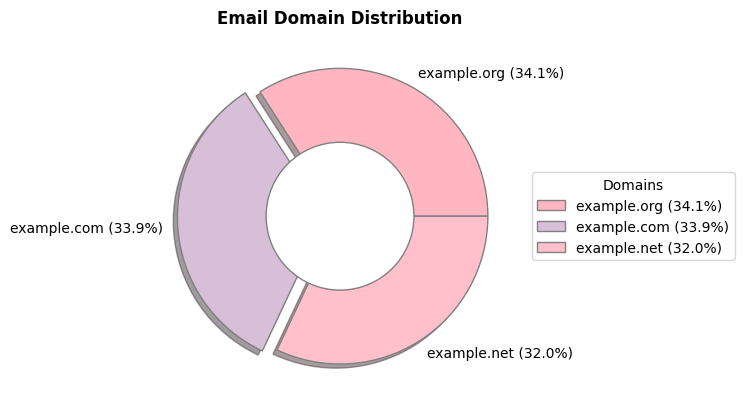

In [7]:
# We make a donut chart, adapted from https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/
plt.pie(
    domaintotals,
    labels=labels,
    colors=colours[:len(domaintotals)],
    explode=(0, 0.1, 0), # "explode" the middle slice
    pctdistance=0.85,
    shadow=True,
    wedgeprops={'edgecolor': 'gray', 'linewidth': 1} )
plt.gca().add_artist(plt.Circle((0, 0), 0.5, color='white', ec='gray')) 
plt.title("Email Domain Distribution", fontsize=12, weight='bold')
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), title="Domains")
shadow=True
plt.show()

#### References

1. [Pandas: Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)  
2. [GeeksforGeeks: Donut Chart using Matplotlib in Python](https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/)  
3. [Matplotlib: Colors Explained](https://matplotlib.org/stable/users/explain/colors/colors.html)  
4. [Microsoft Learn: Customize Cost Analysis Views](https://learn.microsoft.com/en-us/azure/cost-management-billing/costs/media/customize-cost-analysis-views/pivot-charts.png#lightbox)  
5. [Stack Overflow: Customize Pie Chart Labels and Drop Shadow](https://stackoverflow.com/questions/41642126/matplotlib-customize-pie-chart-labels-and-dropshadow)  
6. [GeeksforGeeks: Set Border for Wedges in Matplotlib Pie Chart](https://www.geeksforgeeks.org/how-to-set-border-for-wedges-in-matplotlib-pie-chart/)  
